# Linear Regression using Statistic


In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.


# Simple Linear Regression


In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Prediction using Supervised ML
##Predict the percentage of an student based on the no. of study hours.

In [3]:
#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
#read data through csv
student = pd.read_csv("E:\Grip Project\grip.csv")

In [5]:
student

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


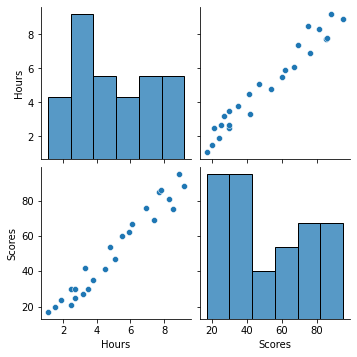

In [6]:
# plotting the pairplot for the dataset given
sn.pairplot(student)
plt.show()

In [7]:
# here we get the shape of the dataset 
student.shape

(25, 2)

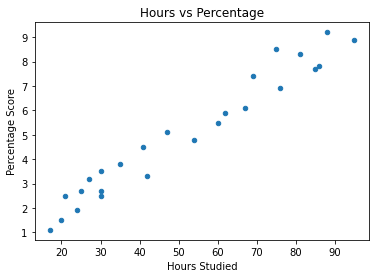

In [8]:
# plotting the distribution of scores 
student.plot(kind="scatter", x='Scores', y="Hours")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [9]:
# corr() gives the correlation between the data
student.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [33]:
# create dataframe for hours and scores
hr = pd.DataFrame(student["Hours"])
sc = pd.DataFrame(student["Scores"])


In [43]:
hr.to_csv("Update_Pred.csv", index="False")

In [12]:
sc

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


In [13]:
# apply Linear Regression model 
lm= linear_model.LinearRegression()
model = lm.fit(hr,sc)

In [14]:
# given variale model represents LinearRegression
model

LinearRegression()

In [15]:
# coef_ represents the coefficient of model
model.coef_

array([[9.77580339]])

In [16]:
# intercept_ represents the coefficient of model
model.intercept_

array([2.48367341])

In [20]:
# y = mx+c
( 9.77580339 * 9.25) + 2.48367341

92.9098547675

In [14]:
new_hr = 9.25
sc_predict = model.predict(np.array([9.25]).reshape(1,- 1))
sc_predict

array([[92.90985477]])

# Linear Regression with Python Scikit Learn using spliting

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables

We do same uptil the graph of distribution of score

#### Preparing the data

 ##The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [48]:
X = student.iloc[:, 0].values  #attributes
y = student.iloc[:, 1].values  # labels
print(X)
print(y)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method

In [49]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [57]:
X_train

array([3.8, 1.9, 7.8, 6.9, 1.1, 5.1, 7.7, 3.3, 8.3, 9.2, 6.1, 3.5, 2.7,
       5.5, 2.7, 8.5, 2.5, 4.8, 8.9, 4.5])

#### Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [59]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train)

print("Training complete.")

Training complete.


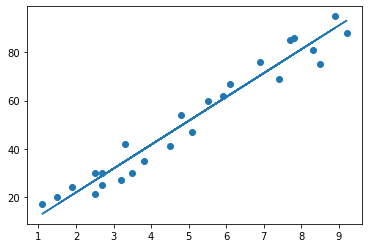

In [60]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### *Making Predictions*
Now that we have trained our algorithm, it's time to make some predictions.

In [63]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test.reshape(-1,1)) # Predicting the scores

[1.5 3.2 7.4 2.5 5.9]


In [64]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [79]:
# You can also test with your own data
hours =np.array([9.25]).reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### *Evaluating the model*
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [80]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
